In [3]:
# #from SHEAP.fitting.functions import linear,GaussianSum,linear2,combine_auto
# from SHEAP.fitting.functions import GaussianSum
# from SHEAP.main_sheap import Sheapectral 
# from SHEAP.spectra_readers import parallel_reader 
# from SHEAP.complex_region.region import ComplexRegion
# from SHEAP.ploting import *
# from SHEAP.host_sub.start_method import Extract_host_star
# from SHEAP.tools.others import wl_to_kms
# from SHEAP.fe_handler import fe_template_read,galaxy_template_read
# from SHEAP.complex_region.building_region import RegionBuilder
# from SHEAP.complex_region.fit_fe import fe_template_read

In [1]:
from sheap.spectra_readers import parallel_reader 
from sheap.MainSheap import Sheapectral 
from sheap.RegionHandler.RegionBuilder import RegionBuilder
from sheap.RegionHandler.RegionFiting import RegionFiting
from sheap.ploting import *

In [2]:
import jax 
from jax import jit 
import jax.numpy as jnp
import glob 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
from paths_func import cross_pandas_spectra
jax.config.update("jax_enable_x64", True)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
path_dr16 = "/home/favila/smbh_mass/dr16"
#path_dr16 = "/home/felipe/work/SMBH_estimation/dr16"

In [5]:
#dr16/subsample_07_03_25.csv

In [6]:
#file_paths,objs_panda  = cross_pandas_spectra(path_dr16,"bernal_sdss_fits","Objects_low_stellar_mass_with_stellar_contribution.csv")
file_paths,objs_panda = cross_pandas_spectra(path_dr16,"new_sub_sample_sdss_fits","subsample_07_03_25.csv")
objs_panda_sort=objs_panda.sort_values("SN_MEDIAN_ALL",ascending=False)[:1500]

You cross match found 11538


In [7]:
objs_panda_sort.shape

(1500, 15)

In [8]:
coords,spectra_reshaped,_ = parallel_reader(objs_panda_sort.fit_path.values)
coords = jnp.array(coords)
spectra_reshaped = jnp.array(spectra_reshaped)

/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:13: RuntimeWarning: divide by zero encountered in divide
  aD = np.array([10**hdul[1].data[key] if key == "loglam" else (1 / np.sqrt(hdul[1].data[key]) if key == "ivar" else hdul[1].data[key]) for key in ["loglam", "flux", "ivar"]])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:13: RuntimeWarning: divide by zero encountered in divide
  aD = np.array([10**hdul[1].data[key] if key == "loglam" else (1 / np.sqrt(hdul[1].data[key]) if key == "ivar" else hdul[1].data[key]) for key in ["loglam", "flux", "ivar"]])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:13: RuntimeWarning: divide by zero encountered in divide
  aD = np.array([10**hdul[1].data[key] if key == "loglam" else (1 / np.sqrt(hdul[1].data[key]) if key == "ivar" else hdul[1].data[key]) for key in ["loglam", "flux", "ivar"]])
/home/favila/smbh_mass/sheap/sheap/spectra_readers.py:13: RuntimeWarning: divide by zero encountered in divide
  aD = np.array([10**hdul[1]

In [9]:
test_clase = Sheapectral(spectra_reshaped,z=objs_panda_sort["Z_DR16Q"].values,coords = coords)
z_s=test_clase.z
norm_factor=10**test_clase.spectra_exp
Spectra = test_clase.spectra

In [20]:
region = RegionBuilder(4400, 5600)
region.make_region(verbose=True,Fe_regions=['Fe_uv',"FeII_IZw1","feII_forbidden","FeII_coronal"],force_linear=True,n_broad =2,narrow_plus=True) #,tied_to=[[["hydrogen","helium"],"center","Halpha_narrow"]])
Hbeta_class = RegionFiting(region.to_complex(add_free=True,free_Fe=False))

A region with limits 4400 to 5600 (A), 
with n_broad = 2 and n_narrow = 1 
and Fe regions ['Fe_uv', 'FeII_IZw1', 'feII_forbidden', 'FeII_coronal'], 
will be created
We assume a local linear continuum


In [145]:
Hbeta_class = RegionFiting("Hbeta")

We assume a local linear continuum


In [146]:
#Hbeta_class = ComplexRegion("Hbeta")
Hbeta_class(Spectra,num_steps=1000)

Runing: tied_params_step_1
learning_rate: 0.1
optimizer: adabelief
num_steps: 1000
Runing: tied_params_step_2
We assume a local linear continuum
learning_rate: 0.01
optimizer: adabelief
num_steps: 2000


(array([   0.,    0.,    0.,    0.,    0., 1249.,    0.,    0.,    0.,
           0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <BarContainer object of 10 artists>)

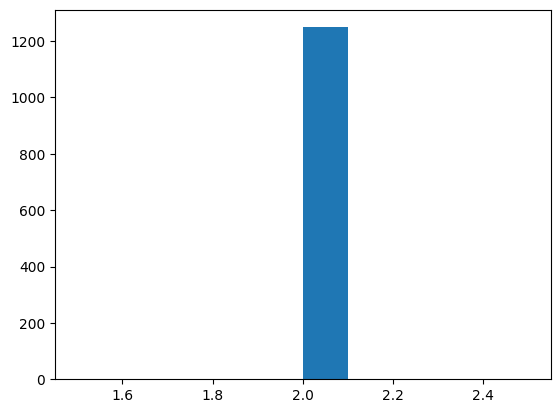

In [158]:
plt.hist(Hbeta_class.params[:,29])

(array([  3.,   8.,  29., 154., 376., 459., 192.,  20.,   5.,   3.]),
 array([-9.5747919 , -7.69856115, -5.82233039, -3.94609964, -2.06986888,
        -0.19363813,  1.68259263,  3.55882338,  5.43505414,  7.31128489,
         9.18751564]),
 <BarContainer object of 10 artists>)

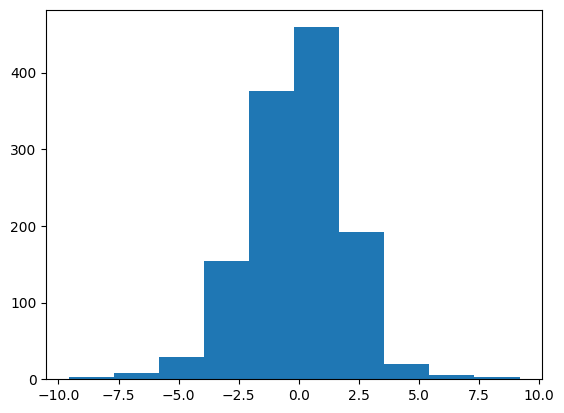

In [149]:
plt.hist(Hbeta_class.params[:,30])

(array([1.244e+03, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.11748273, 0.23496546, 0.35244819, 0.46993092,
        0.58741365, 0.70489638, 0.82237911, 0.93986184, 1.05734457,
        1.1748273 ]),
 <BarContainer object of 10 artists>)

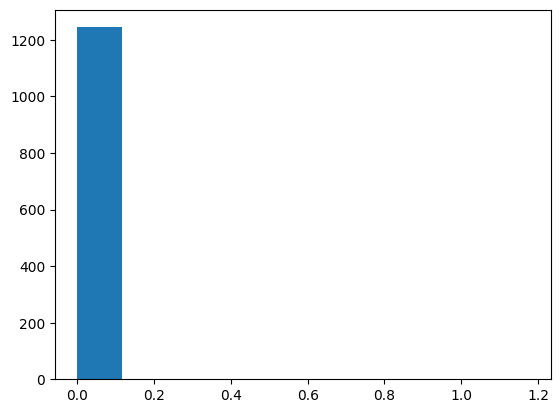

In [150]:
plt.hist(Hbeta_class.params[:,31])

In [100]:
Hbeta_class.params_dict

{'amplitude_HeIIb_narrow': 0,
 'center_HeIIb_narrow': 1,
 'width_HeIIb_narrow': 2,
 'amplitude_HeIIb_broad': 3,
 'center_HeIIb_broad': 4,
 'width_HeIIb_broad': 5,
 'amplitude_Hbeta_narrow': 6,
 'center_Hbeta_narrow': 7,
 'width_Hbeta_narrow': 8,
 'amplitude_Hbeta_broad': 9,
 'center_Hbeta_broad': 10,
 'width_Hbeta_broad': 11,
 'amplitude_Hbeta_broad_2': 12,
 'center_Hbeta_broad_2': 13,
 'width_Hbeta_broad_2': 14,
 'amplitude_OIIIb_narrow': 15,
 'center_OIIIb_narrow': 16,
 'width_OIIIb_narrow': 17,
 'amplitude_OIIIa_narrow': 18,
 'center_OIIIa_narrow': 19,
 'width_OIIIa_narrow': 20,
 'amplitude_OIIIb_broad': 21,
 'center_OIIIb_broad': 22,
 'width_OIIIb_broad': 23,
 'amplitude_OIIIb_broad_2': 24,
 'center_OIIIb_broad_2': 25,
 'width_OIIIb_broad_2': 26,
 'm_cont': 27,
 'b_cont': 28,
 'log_FWHM_broad_Fe_OP': 29,
 'shift_Fe_OP': 30,
 'scale_Fe_OP': 31}

Array([  6.22378106, -10.        ,   0.02534188], dtype=float64)

Array([3224.92885823, 3225.67068724, 3226.41457575, ...,           nan,
                 nan,           nan], dtype=float64)

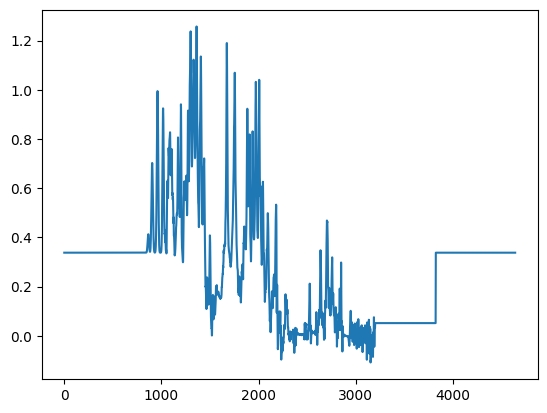

In [156]:
n = 1
plt.plot(Hbeta_class.profile_function_list[-1](Hbeta_class.region_to_fit[n][0],Hbeta_class.params[n][-3:]))

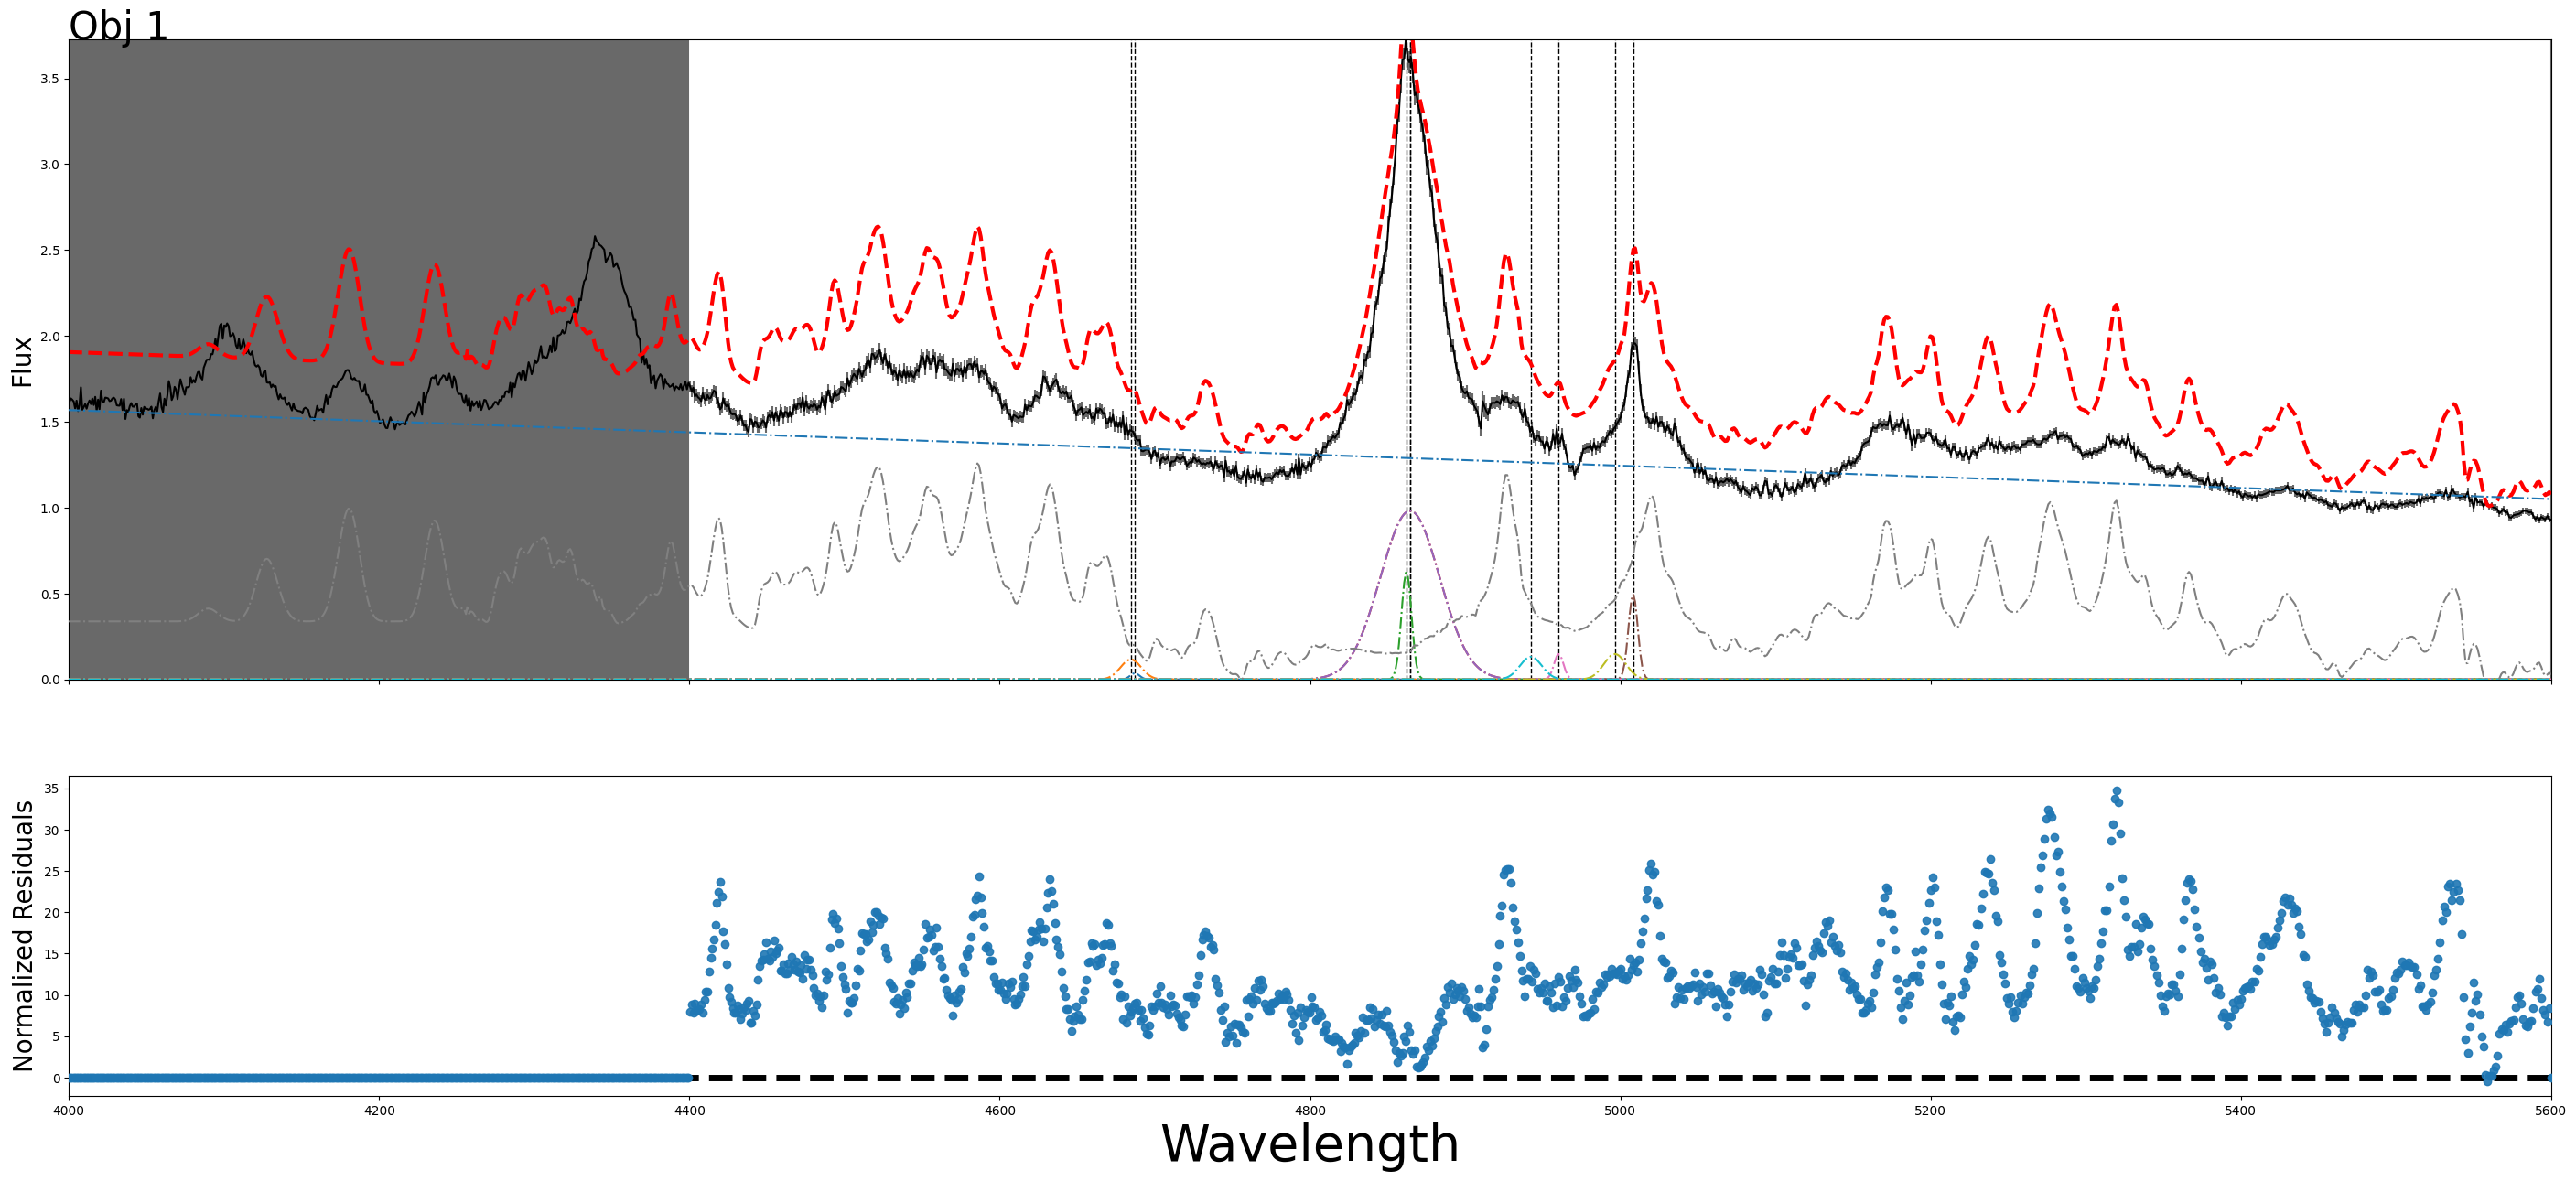

SDSS_NAME                                       232317.97+282759.9
Z_DR16Q                                                   0.160277
FHOST_5100                                                0.600436
Z_FIT                                                     0.160277
PLATE                                                         7702
MJD                                                          58017
FIBERID                                                        850
RA                                                      350.824902
DEC                                                      28.466655
EBV                                                        0.09913
IF_BOSS_SDSS                                                  BOSS
SN_MEDIAN_ALL                                            23.488781
LOGL5100                                                 43.724088
dr_name                                            7702-58017-0850
fit_path         /home/favila/smbh_mass/dr16/new_sub_sample_sd

In [155]:
n = 1
region_plot = SheapRegionplot(Hbeta_class)
region_plot.plot(n,xlim=[4000, 5600])#207
objs_panda.iloc[n]

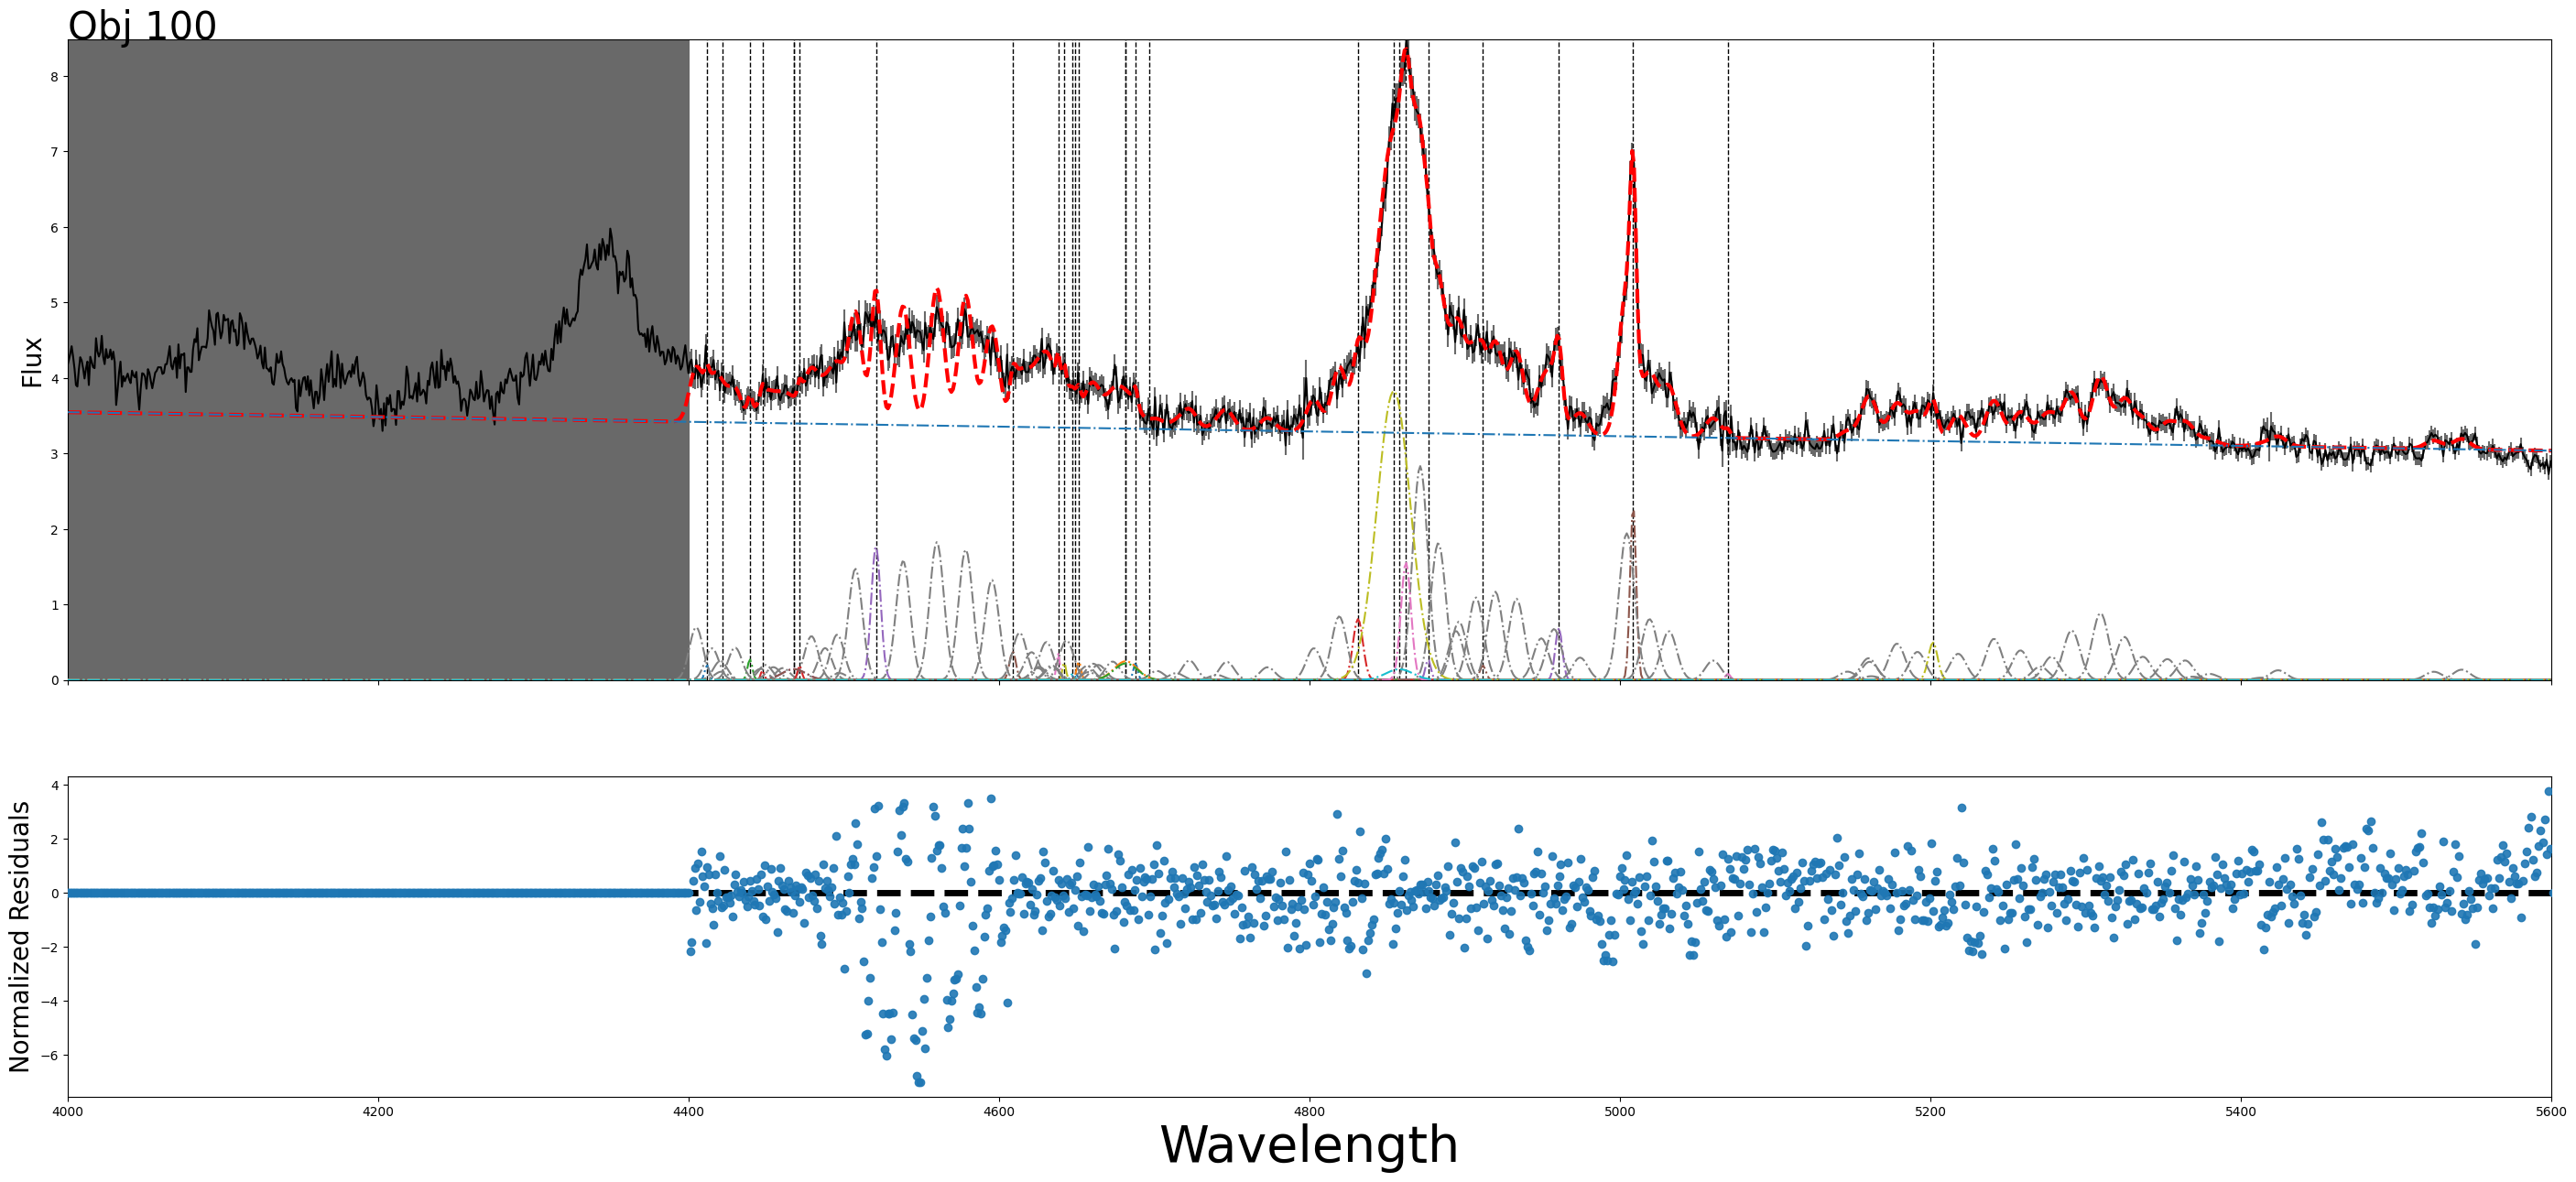

SDSS_NAME                                       021218.32-073719.8
Z_DR16Q                                                   0.173906
FHOST_5100                                                0.778512
Z_FIT                                                     0.173906
PLATE                                                          667
MJD                                                          52163
FIBERID                                                        567
RA                                                       33.076364
DEC                                                      -7.622178
EBV                                                       0.022527
IF_BOSS_SDSS                                                  SDSS
SN_MEDIAN_ALL                                            24.318512
LOGL5100                                                 44.159301
dr_name                                            0667-52163-0567
fit_path         /home/favila/smbh_mass/dr16/new_sub_sample_sd

In [14]:
n = 100
region_plot = SheapRegionplot(Hbeta_class)
region_plot.plot(n,xlim=[4000, 5600])#207
objs_panda.iloc[n]